## Movie Dataset Visualizations
This notebook contains various visualizations for the movie dataset.

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from surprise import Dataset, Reader, KNNBasic, dump
from surprise.model_selection import train_test_split
from surprise import accuracy

# Setting the aesthetics for the plots
sns.set(style="whitegrid")


In [3]:
# read u.genre
u_genre = pd.read_csv('u.genre', sep='|', header=None)
u_genre.columns = ['genre', 'genre_id']

# read u1.base ... u5.base and combine it
u1_base = pd.read_csv('u1.base', sep='\t', header=None)
u1_base.columns = ['user_id', 'item_id', 'rating', 'timestamp']
u2_base = pd.read_csv('u2.base', sep='\t', header=None)
u2_base.columns = ['user_id', 'item_id', 'rating', 'timestamp']
u3_base = pd.read_csv('u3.base', sep='\t', header=None)
u3_base.columns = ['user_id', 'item_id', 'rating', 'timestamp']
u4_base = pd.read_csv('u4.base', sep='\t', header=None)
u4_base.columns = ['user_id', 'item_id', 'rating', 'timestamp']
u5_base = pd.read_csv('u5.base', sep='\t', header=None)
u5_base.columns = ['user_id', 'item_id', 'rating', 'timestamp']

u1_base = pd.concat([u1_base, u2_base, u3_base, u4_base, u5_base])


# read u1.test
u1_test = pd.read_csv('u1.test', sep='\t', header=None)
u1_test.columns = ['user_id', 'item_id', 'rating', 'timestamp']

# read u.user
u_user = pd.read_csv('u.user', sep='|', header=None)
u_user.columns = ['user_id', 'age', 'gender', 'occupation', 'zip code']

# read u.item
u_item = pd.read_csv('u.item', sep='|', header=None, encoding='latin-1')
u_item.columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDB_URL'] + list(u_genre['genre'])


Text(0, 0.5, 'Genre')

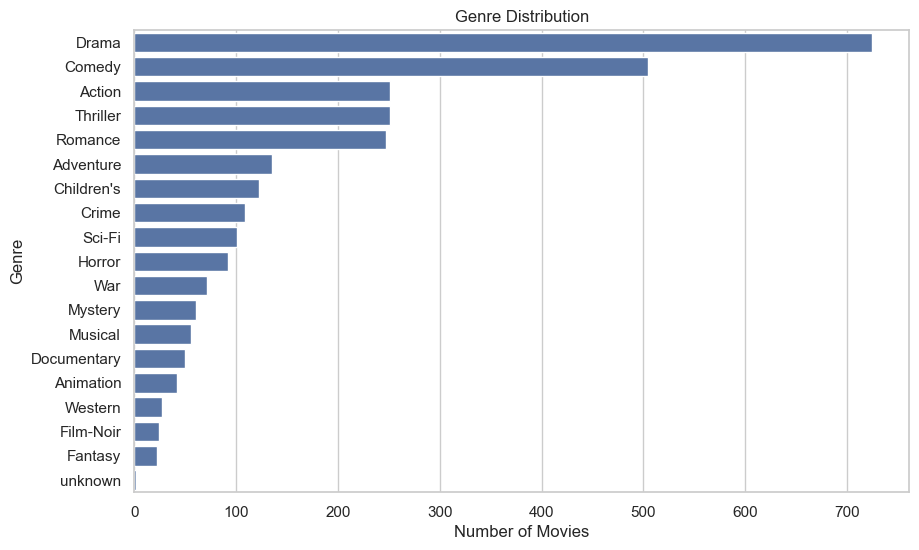

In [4]:

# Assuming 'u_item' is the DataFrame containing the movie data
genre_counts = u_item.drop(['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDB_URL'], axis=1).sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Genre Distribution')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')


Text(0, 0.5, 'Number of Movies')

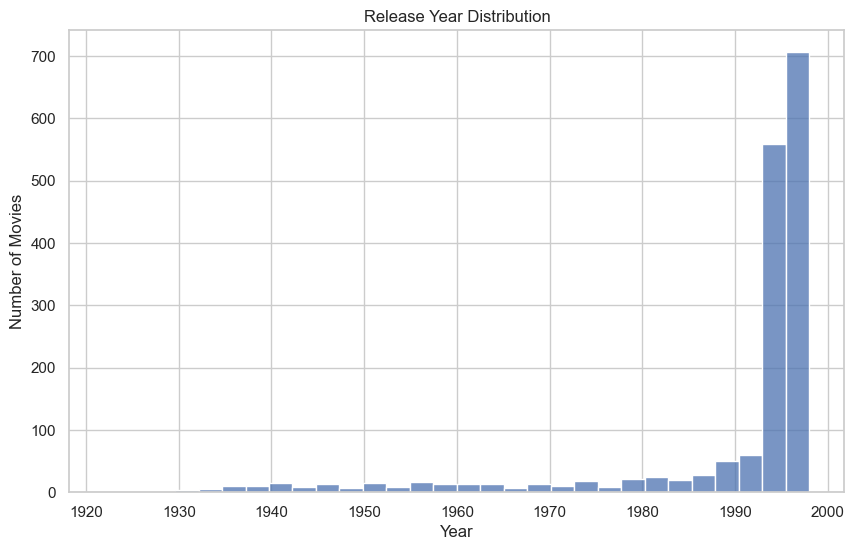

In [5]:

# Extracting year from the release date and creating a histogram
u_item['year'] = pd.to_datetime(u_item['release_date']).dt.year
plt.figure(figsize=(10,6))
sns.histplot(u_item['year'], bins=30, kde=False)
plt.title('Release Year Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Movies')


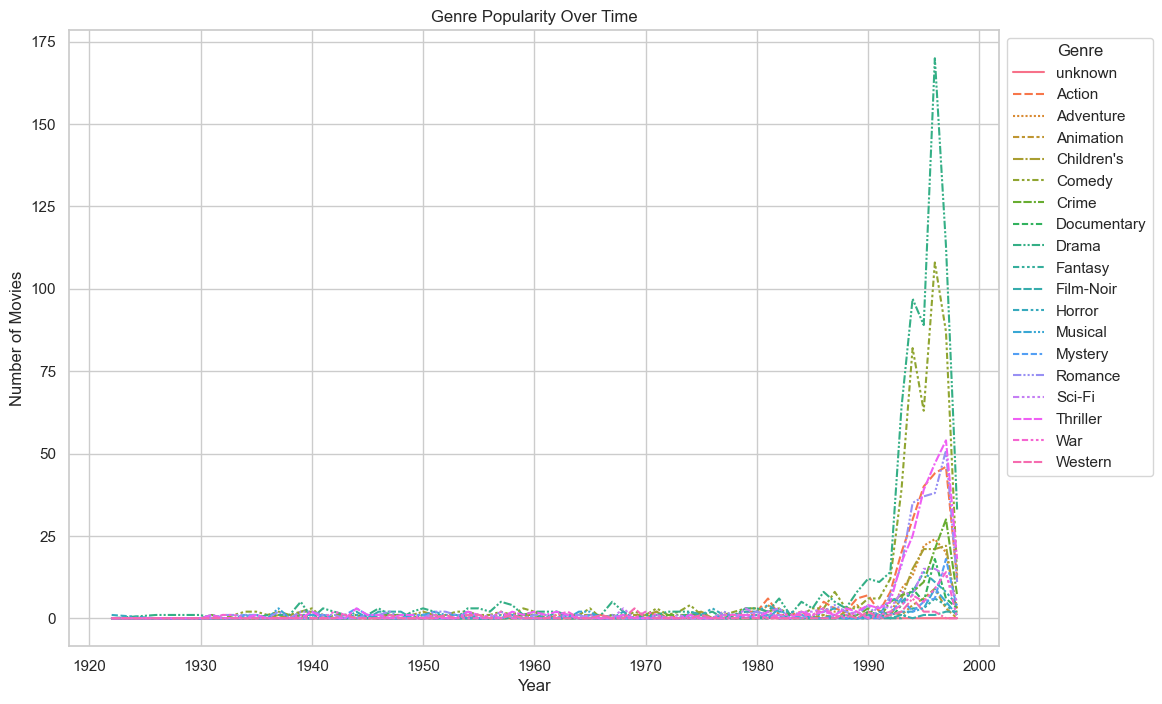

In [6]:

# This requires processing to calculate the popularity of each genre over time
# Assuming 'u_item' has a 'year' column and genre columns

# Reshaping the DataFrame
genres_over_time = u_item.drop(['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDB_URL'], axis=1)
genres_over_time = genres_over_time.set_index('year')
genres_over_time = genres_over_time.groupby('year').sum()

plt.figure(figsize=(12,8))
sns.lineplot(data=genres_over_time)
plt.title('Genre Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1))


Text(0, 0.5, 'Number of Users')

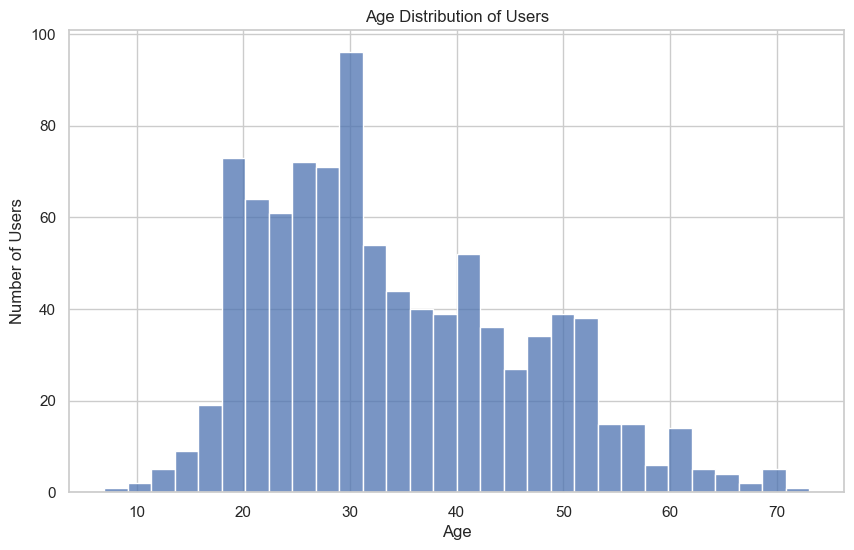

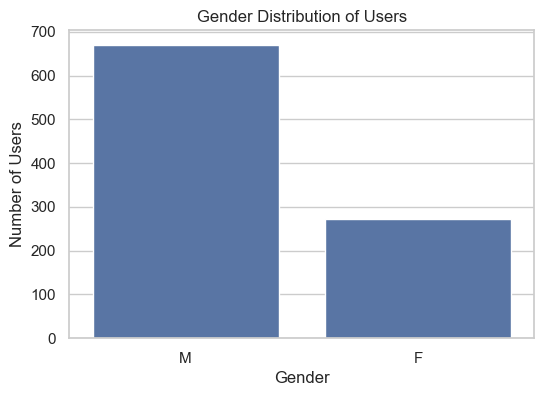

In [7]:

# Assuming 'u_user' is the DataFrame containing user data

# Plotting age distribution
plt.figure(figsize=(10,6))
sns.histplot(u_user['age'], bins=30)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')

# Plotting gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=u_user)
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
